In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchviz import make_dot

## まずはグラフの描画

In [2]:
def f(x):
    return (2*x**2+2)

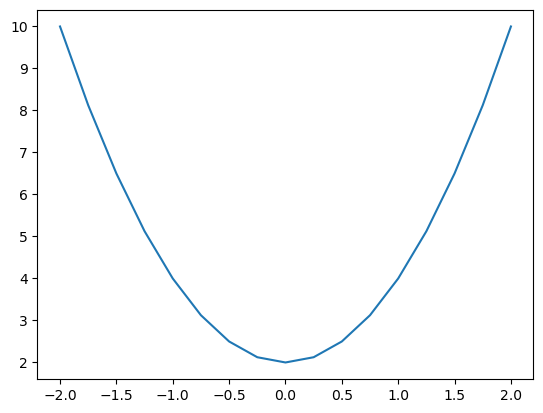

In [3]:
x = np.arange(-2,2.1,0.25)
y = f(x)
plt.plot(x,y)

## 数値微分をしてみよう

In [4]:
def fdiff(f):
    def diff(x):
        h = 1e-6
        return (f(x+h)-f(x-h))/(2*h)
    return diff

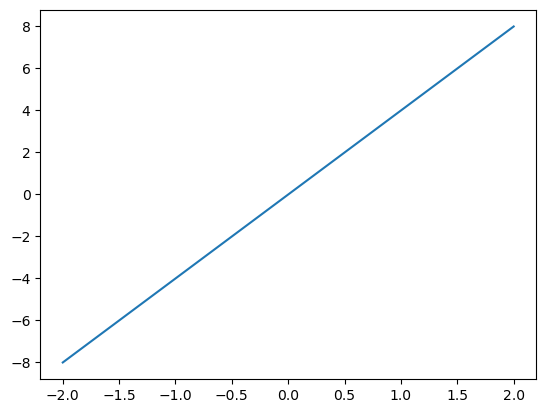

In [5]:
diff = fdiff(f)
y_dash = diff(x)

plt.plot(x,y_dash)

## numpyとtorchの関係を調べてみよう

In [6]:
n1 = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]
])
print(n1)
print(n1.shape)
print(len(n1))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
(4, 3)
4


In [7]:
n1_tens = torch.tensor(n1).float()
print(n1_tens.shape)
n2_tens = n1_tens.view(-1)
print(n2_tens)
print("device: ",n1_tens.device)

torch.Size([4, 3])
tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])
device:  cpu


In [8]:
scalar_tens = torch.tensor(1.0).float()
print(scalar_tens)
print(scalar_tens.shape)
print(scalar_tens.item())
print(type(scalar_tens.item()))

tensor(1.)
torch.Size([])
1.0
<class 'float'>


In [9]:
scalar_tens = torch.tensor(1.0).long()
print(scalar_tens)
print(scalar_tens.shape)
print(scalar_tens.item())
print(type(scalar_tens.item()))

tensor(1)
torch.Size([])
1
<class 'int'>


tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000])


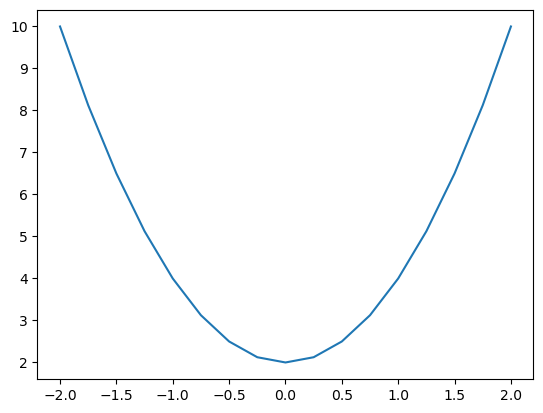

In [10]:
x_np = np.arange(-2,2.1,0.25)
x = torch.tensor(x_np,dtype=torch.float32)
print(x)
y = 2*x**2+2
plt.plot(x.data,y.data)
plt.show()

## 自動微分をしてみよう

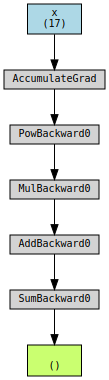

In [11]:
x_np = np.arange(-2,2.1,0.25)
x = torch.tensor(x_np,requires_grad=True,dtype=torch.float32)
y = 2*x**2+2
z=y.sum()
g = make_dot(z,params={'x':x})
display(g)

In [12]:
z.backward()
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


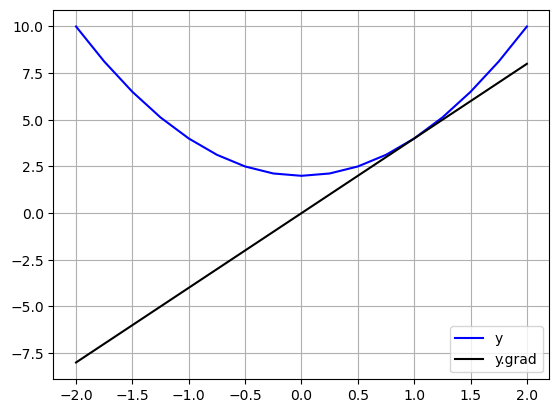

In [13]:
plt.plot(x.data,y.data,c='b',label='y')
plt.plot(x.data,x.grad.data,c='k',label='y.grad')
plt.legend()
plt.grid(True)
plt.show()